In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

## 分類の評価指標

In [2]:
n_features = 5
x_clf, y_clf = make_classification(n_features=n_features, random_state=1234)
x_reg, y_reg = make_regression(n_features=n_features, noise=0.1, random_state=1234)

def to_dataframe(x, y):
    return pd.DataFrame(np.column_stack([x, y]), columns=[f'$x_{i+1}$' for i in range(x.shape[1])]+['$y_{true}$'])

x_clf_train, x_clf_test, y_clf_train, y_clf_test = train_test_split(x_clf, y_clf, random_state=1234)
clf_train = to_dataframe(x_clf_train, y_clf_train)
print('clf_train')
display(clf_train)
clf_test = to_dataframe(x_clf_test, y_clf_test)
print('clf_test')
display(clf_test)

x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, random_state=1234)
reg_train = to_dataframe(x_reg_train, y_reg_train)
print('reg_train')
display(reg_train)
reg_test = to_dataframe(x_reg_test, y_reg_test)
print('reg_test')
display(reg_test)

clf_train


,$x_1$,$x_2$,$x_3$,$x_4$,$x_5$,$y_{true}$
0,-1.264517,-0.317810,1.192785,2.276830,1.431184,1.0
1,0.909403,0.073113,-0.960346,-1.714961,0.298984,0.0
...,...,...,...,...,...,...
73,-0.948686,-0.893450,0.462831,1.381451,-1.268994,1.0
74,-1.250956,-1.747812,0.234538,1.537458,1.076541,1.0


clf_test


,$x_1$,$x_2$,$x_3$,$x_4$,$x_5$,$y_{true}$
0,0.439331,0.839825,0.066697,-0.427226,-0.660230,0.0
1,-0.397057,0.581005,0.823577,1.054490,-0.061246,1.0
...,...,...,...,...,...,...
23,0.998859,1.101113,-0.381504,-1.374502,0.387674,0.0
24,-0.116642,-1.791178,-1.052071,-0.668758,-0.157099,0.0


reg_train


,$x_1$,$x_2$,$x_3$,$x_4$,$x_5$,$y_{true}$
0,1.384580,1.951103,-0.286425,0.500070,-0.278367,98.163942
1,-0.684128,0.331527,0.599962,-0.217199,-0.383365,-47.749979
...,...,...,...,...,...,...
73,1.015405,0.440266,0.749185,-0.675521,0.688972,162.855411
74,-0.897157,0.755414,-0.136795,0.018289,0.215269,-66.752940


reg_test


,$x_1$,$x_2$,$x_3$,$x_4$,$x_5$,$y_{true}$
0,1.343182,-1.553342,-0.050540,-0.364010,-0.319298,69.510039
1,0.264534,-0.174298,0.565658,0.585084,-1.071369,8.398147
...,...,...,...,...,...,...
23,-0.240483,-1.815558,0.585599,0.352801,-0.910124,-33.476320
24,0.023558,-0.722662,-0.660230,-0.318685,0.177387,-45.749417


### 正確度 (accuracy)
---
正解率のこと。

$
{\displaystyle 正確度=\frac
    {正解数}
    {サンプルサイズ}
}
$

###### 練習問題

`clf_pred`データセットを元に、正確度を算出する。

In [3]:
model = LogisticRegression().fit(x_clf, y_clf)
clf_pred = pd.DataFrame({'正解':y_clf, '予測':model.predict(x_clf)})
print('clf_pred')
display(clf_pred)

clf_pred


/root/local/python-3.7.4/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,正解,予測
0,1,1
1,0,0
...,...,...
98,0,0
99,1,1


In [4]:
sum(clf_pred['正解'] == clf_pred['予測']) / clf_pred['正解'].count()

0.93

#### Pythonでの正確度算出方法
---
学習済み分類モデルの`score`メソッドか、`sklearn.metrics.accuracy_score`を使用する。引数に渡す値がそれぞれ異なる。

In [5]:
model_clf = LogisticRegression()
model_clf.fit(x_clf_train, y_clf_train)

/root/local/python-3.7.4/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
LogisticRegression.score??

In [7]:
model_clf.score(x_clf_test, y_clf_test)

0.88

In [8]:
accuracy_score??

In [9]:
y_clf_hat = model_clf.predict(x_clf_test)
accuracy_score(y_clf_test, y_clf_hat)

0.88

## 回帰の評価指標
---
分類モデルに比べると問題ごとに異なる指標を選んだり、自分で設計する必要性が高い。

### 決定係数 $\left( R^{2}\right)$
---
$
\displaystyle R^{2} =1-\frac
    {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
    {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
$

回帰分析では決定係数 $R^2$ は (重) 相関係数の二乗と一致していたが、それ以外のモデルではそのような一致は見られない。この場合、単に**正解ラベルの分散をどれくらいうまく捕捉できているかの指標**に過ぎず、値がマイナスになることもある。

#### Pythonでの決定係数算出方法
---
学習済み回帰モデルの`score`メソッドか、`sklearn.metrics.r2_score`を使用する。

In [10]:
model_reg = LinearRegression()
model_reg.fit(x_reg_train, y_reg_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
LinearRegression.score??

In [12]:
model_reg.score(x_reg_test, y_reg_test)

0.9999988051140659

In [13]:
r2_score??

In [14]:
y_reg_hat = model_reg.predict(x_reg_test)
r2_score(y_reg_test, y_reg_hat)

0.9999988051140659

### 平均二乗誤差 (MSE, Mean Squared Error)
---
残差の二乗の平均。  
最小二乗法の場合、 $\overline{e} =0$ より残差の分散に等しい。

$
\displaystyle \begin{aligned}
    MSE & =\frac
        {\displaystyle \sum ^{n}_{i=1} e^{2}_{i}}
        {n}
    \\
     & \\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
         {n}
\end{aligned}
$

元の $y$ とスケールを揃える場合、平均二乗誤差の平方根 (RMSE, Root Mean Squared Error) を使用することもある。  
最小二乗法の場合、残差の標準偏差に等しい。

$\displaystyle RMSE=\sqrt{MSE}$

###### 練習問題

`reg_pred`データセットを元に、平均二乗誤差を算出する。

In [15]:
model = LinearRegression().fit(x_reg, y_reg)
reg_pred = pd.DataFrame({'正解':y_reg, '予測':model.predict(x_reg)})
print('reg_pred')
display(reg_pred)

reg_pred


,正解,予測
0,-88.673382,-88.683914
1,151.441869,151.389445
...,...,...
98,-332.315818,-332.225865
99,100.990582,100.988929


In [16]:
np.mean((reg_pred['正解'] - reg_pred['予測'])**2)

0.010575141915502967

#### Pythonでの平均二乗誤差算出方法
---
`sklearn.metrics.mean_squared_error`を使用する。

In [17]:
mean_squared_error??

In [18]:
mean_squared_error(y_reg_test, y_reg_hat)

0.01642733446295104

### 平均絶対誤差 (MAE, Mean Absolute Error)
---
残差の絶対値の平均。

$
\displaystyle \begin{aligned}
    MAE & =\frac
        {\displaystyle \sum ^{n}_{i=1} |e|}
        {n}\\
     & \\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left| y_{i} -\hat{y}_{i}\right|}
         {n}
\end{aligned}
$

###### 練習問題

`reg_pred`データセットを元に、平均絶対誤差を算出する。

In [19]:
np.abs(reg_pred['正解'] - reg_pred['予測']).mean()

0.07835245094121417

#### Pythonでの平均絶対誤差算出方法
---
`sklearn.metrics.mean_absolute_error`を使用する。

In [20]:
mean_absolute_error??

In [21]:
mean_absolute_error(y_reg_test, y_reg_hat)

0.11062328717271676

### 残差プロット
---
視覚的にモデルが捉えきれていない特徴がないか確認する手法。  
横軸に予測値・縦軸に残差をとった散布図。

下図は $y=x^{3}$ の分布からサンプリングしたデータに線形回帰を実行したときの残差プロット。

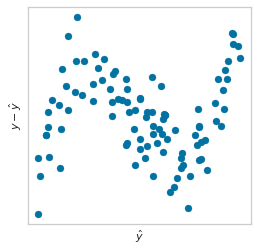

In [22]:
from my_functions.metrics import residual_plot
residual_plot.show()

###### 練習問題

`reg_train`データセットに線形回帰を適用し、残差プロットを表示する。

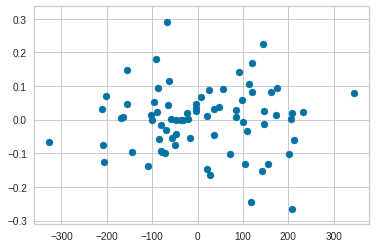

In [23]:
dataset = reg_train.values
y_reg_hat_train = LinearRegression().fit(
    dataset[:, :-1], dataset[:, -1]).predict(dataset[:, :-1])
plt.scatter(y_reg_hat_train, y_reg_train - y_reg_hat_train)
plt.show()

#### Pythonでの残差プロット表示方法
---
`yellowbrick.regressor.ResidualsPlot`を使用する。 (yellowbrickはインポートするとmatplotlibの設定を書き換えるので注意)

In [24]:
ResidualsPlot??

0.9999988051140659

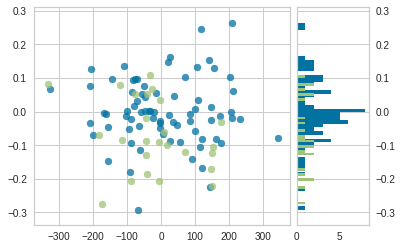

In [25]:
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(x_reg_train, y_reg_train)
visualizer.score(x_reg_test, y_reg_test)